In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from reader import read_data_raw

In [3]:
X, y = read_data_raw()

In [4]:
X.describe()

,theta,energy,r,r_plane,S,delta_t,dt_aop,dt_peaks,dtul_asymm,dtapcnt_u,dtapcnt_l
count,684776.000000,684776.000000,684776.000000,684776.000000,684776.000000,684776.000000,684776.000000,684776.000000,684776.000000,684776.000000,684776.000000
mean,29.655581,35.907148,1.485130,-0.046146,14.126514,0.236737,314.365326,8.207979,0.293027,1.171059,1.010361
std,10.213045,29.241161,0.577251,0.692150,32.294993,0.278437,228.981640,6.716784,0.163903,1.403617,1.262549
min,0.711156,1.074030,0.500003,-3.981340,0.466668,-1.035940,40.482500,0.000000,0.000000,0.000000,0.000000
25%,23.902900,11.703475,1.054430,-0.479219,1.088820,0.051575,131.300750,3.000000,0.172899,0.000000,0.000000
50%,30.822300,26.003050,1.420825,-0.041805,2.900060,0.143823,238.627000,6.000000,0.267908,1.000000,1.000000
75%,37.992000,53.766600,1.830260,0.393841,10.630350,0.316943,451.126250,12.000000,0.381605,2.000000,2.000000
max,44.999600,145.464000,5.210260,3.391140,534.728000,4.578150,1934.280000,45.000000,1.115130,16.000000,22.000000


In [5]:
y.describe()

,top_integral_all,top_integral_mu,bot_integral_all,bot_integral_mu
count,684776.000000,684776.000000,684776.000000,684776.000000
mean,1602.002948,288.173046,1548.589200,291.122583
std,3680.579160,619.861040,3545.139335,615.943851
min,0.000000,0.000000,0.000000,0.000000
25%,121.000000,39.000000,119.000000,39.000000
50%,332.000000,94.000000,326.000000,95.000000
75%,1209.000000,268.000000,1179.000000,271.000000
max,61519.000000,27581.000000,63376.000000,26920.000000


0.009494832094158289 +/- 0.006028962148879864
0.009718791373649492 +/- 0.006892940905956505


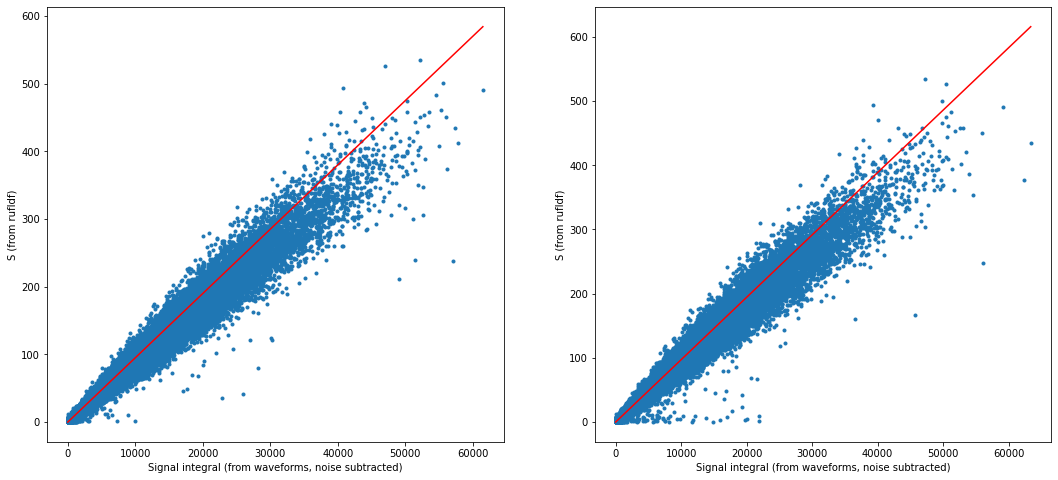

In [6]:
fig, axes = plt.subplots(figsize=(18, 8), ncols=2)

y_reg = X["S"].to_numpy()

for ax, param_name in zip(axes, ["top_integral_all", "bot_integral_all"]):
    x_reg = y[param_name].to_numpy()
    ax.scatter(x_reg, y_reg, marker=".")
    
    mask = x_reg > 0
    slope_sample = y_reg[mask] / x_reg[mask]
    slope_mean = slope_sample.mean()
    slope_std = slope_sample.std()
    print(f"{slope_mean} +/- {slope_std}")
    x_line_plot = np.array([x_reg.min(), x_reg.max()])
    ax.plot(x_line_plot, slope_mean * x_line_plot, color="red", label="linear fit")
    # ax.plot(x_line_plot, (slope_mean + slope_std) * x_line_plot, color="red", linestyle="--")
    # ax.plot(x_line_plot, (slope_mean - slope_std) * x_line_plot, color="red", linestyle="--")

    ax.set_ylabel("S (from rufldf)")
    ax.set_xlabel("Signal integral (from waveforms, noise subtracted)")
plt.show()